In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X=np.genfromtxt('../../neptune/input.txt')
Y=np.genfromtxt('../../neptune/output.txt').reshape(-1,1)
z=np.genfromtxt('../../neptune/test_in.txt')
Yz=np.genfromtxt('../../neptune/test_out.txt')

In [3]:
ker1=kernel(length=np.array([1,1,1,1,1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
#ker2=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1,scale_est=1)
ker_all=combine(ker1,ker3)
m=dgp(X,Y,ker_all)

In [4]:
m.train(N=400,sub_burn=10,method='L-BFGS-B')

In [9]:
m.final_kernel[1].scale

1493.64783700252

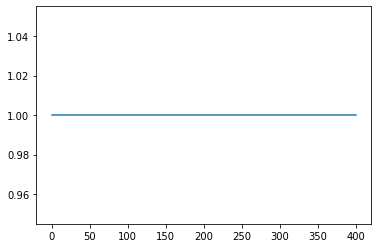

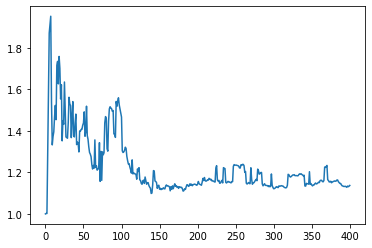

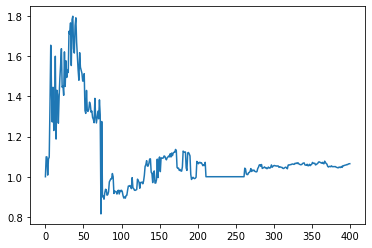

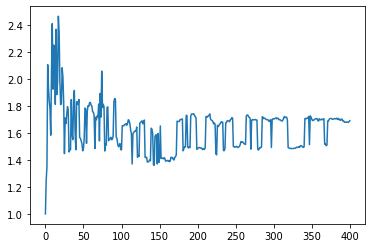

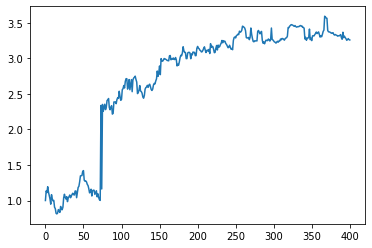

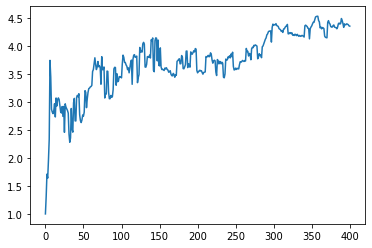

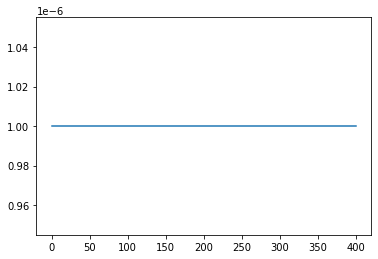

In [10]:
m.plot(0)

In [6]:
m.update_final_kernel(300)

In [7]:
mu,var=m.predict(z, N=300, burnin=0,method='mean_var')

se = 0.013584690394489734


0.06131289915767117

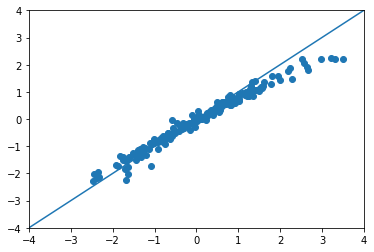

In [8]:
plt.scatter(mu,Yz)
plt.xlim((-4, 4)) 
plt.ylim((-4, 4)) 
plt.plot( [-4,4],[-4,4] )
np.sqrt(np.mean((mu-Yz)**2))/(np.max(Yz)-np.min(Yz))

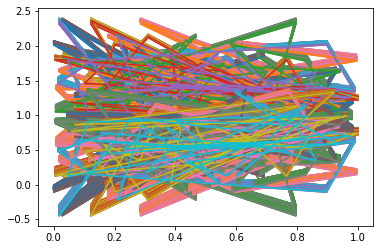

In [11]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[0][i],m.samples[1][i])

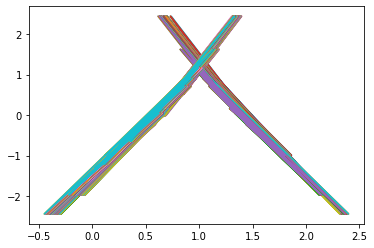

In [12]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[1][i],m.samples[2][i])